# Project: Investigate Doctor_No_Show Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and it's focused on:
1. the question of whether or not patients show up for their appointment
2. what factors are effecting their decision.

##### *dataset's columns:*
* Be careful about the encoding of the 'Attendance' column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
* 'SMS_Received' indecates whether or not the patient received a reminder message.
* ‘Subsidy’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* ‘Scheduled_Day’ tells us on what day the patient set up their appointment.
* 'Appointment_Day' tells us on what date was the appointment.
* 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap' columns: 1 if the pateint Infected with any of these chronic illnesses and 0 if not.

##### *You can find the original datast [here](https://www.kaggle.com/joniarroba/noshowappointments)*


In [1]:
# Importing important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading the dataset and investigating it  
dataframe = pd.read_csv('KaggleV2-May-2016.csv') 
dataframe.sample(5)

# PS: I changed some column names in the excel sheet + dropped the columns i don't need for analysis just to make it cleaner.

,Attendance,Gender,Age,SMS_Received,Subsidy,Scheduled_Day,Appointment_Day,Hipertension,Diabetes,Alcoholism,Handicap
40101,No,F,51,0,0,2016-05-04T12:52:34Z,2016-05-06T00:00:00Z,0,0,0,0
44617,No,F,14,0,0,2016-05-05T14:21:10Z,2016-05-19T00:00:00Z,0,0,0,0
10197,No,M,77,0,0,2016-04-15T08:05:22Z,2016-05-04T00:00:00Z,1,1,0,0
103516,No,F,29,1,0,2016-06-03T09:31:17Z,2016-06-08T00:00:00Z,0,0,0,0
36972,No,F,20,1,0,2016-05-03T14:15:31Z,2016-05-12T00:00:00Z,0,0,0,0


In [3]:
#my own shape function
def myshape (df):
    #first counting rows:
    rows = 0
    for row in df.iterrows():
        rows += 1
    #now columns:
    columns = 0
    for column in df.columns:
        columns += 1
    return (rows, columns)

myshape(dataframe)

(110527, 11)

In [4]:
#testing
dataframe.shape

(110527, 11)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Attendance       110527 non-null  object
 1   Gender           110527 non-null  object
 2   Age              110527 non-null  int64 
 3   SMS_Received     110527 non-null  int64 
 4   Subsidy          110527 non-null  int64 
 5   Scheduled_Day    110527 non-null  object
 6   Appointment_Day  110527 non-null  object
 7   Hipertension     110527 non-null  int64 
 8   Diabetes         110527 non-null  int64 
 9   Alcoholism       110527 non-null  int64 
 10  Handicap         110527 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


In [6]:
dataframe.describe()

,Age,SMS_Received,Subsidy,Hipertension,Diabetes,Alcoholism,Handicap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.321026,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110205,0.466873,0.297675,0.397921,0.258265,0.171686,0.161543
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
sum(dataframe.duplicated())

722

### *Quality Issues:*

* erroneous data type of (Gender, Scheduled_Day, Appointment_Day, Subsidy, Hipertension, Diabetes, Alcoholism, Handicap, SMS_Received, Attendance) columns.
* inaccurate data. (Age < 0), (Handicap Values > 1), (some appointment dates are after the schudled dates)
* inconsistent dates in Appointment_Day column and Scheduled_Day column.
* duplicated data.

### *Tidness Issues:*

-  1 variable (Diseases) is divided into 4 columns (Hipertension, Diabetes, Alcoholism, Handicap)

### Data Cleaning

In [8]:
#let's take a copy first
df = dataframe.copy()

In [9]:
# dropping the inaccurate data
df.drop(df.query('Handicap > 1').index, inplace = True)
df.drop(df.query('Age < 0').index, inplace = True)

# testing:
df.shape

(110327, 11)

In [10]:
# correctio the data types
df.Scheduled_Day = pd.to_datetime(df.Scheduled_Day).dt.floor('d').astype('datetime64[ns]') #notice this may lead to more duplicated data.
df.Appointment_Day = pd.to_datetime(df.Appointment_Day).astype('datetime64[ns]')

df.Gender = df.Gender.astype('category')

# make the values in attendance column more logical
df.Attendance.replace({'Yes': 0, 'No': 1}, inplace = True)
df[['Subsidy', 'SMS_Received', 'Attendance']] = df[['Subsidy', 'SMS_Received', 'Attendance']].astype('bool')

# testing:
df.dtypes

Attendance                   bool
Gender                   category
Age                         int64
SMS_Received                 bool
Subsidy                      bool
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
dtype: object

In [11]:
# merge the divided data
df['Chronic_Illnesses'] = df.Hipertension + df.Diabetes + df.Alcoholism + df.Handicap
df.Chronic_Illnesses.replace({0 : 'Zero', 1 : "One", 2 : "Two", 3 : "Three", 4 : "Four"}, inplace = True)
df.Chronic_Illnesses = df.Chronic_Illnesses.astype("category")

# testing
df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handicap','Chronic_Illnesses']].sample(5)

,Hipertension,Diabetes,Alcoholism,Handicap,Chronic_Illnesses
10040,0,0,0,0,Zero
53310,1,0,0,0,One
104354,1,0,0,1,Two
66301,1,0,0,0,One
85635,0,0,0,0,Zero


In [12]:
#correct the erroneous datatypes
df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handicap']] = df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handicap']].astype('bool')

# testing 
df.dtypes

Attendance                     bool
Gender                     category
Age                           int64
SMS_Received                   bool
Subsidy                        bool
Scheduled_Day        datetime64[ns]
Appointment_Day      datetime64[ns]
Hipertension                   bool
Diabetes                       bool
Alcoholism                     bool
Handicap                       bool
Chronic_Illnesses          category
dtype: object

In [13]:
# calculating the waiting time in days
df['Waiting_Days'] = (df.Appointment_Day - df.Scheduled_Day).dt.days

#testing
df[['Scheduled_Day', 'Appointment_Day', 'Waiting_Days']].sample(5)

,Scheduled_Day,Appointment_Day,Waiting_Days
27474,2016-04-29,2016-05-03,4
52008,2016-05-09,2016-05-12,3
67538,2016-05-16,2016-05-16,0
21283,2016-04-27,2016-05-19,22
9728,2016-04-14,2016-05-02,18


In [14]:
# dropping the erroneous data:
df.drop(df.query('Waiting_Days < 0').index, inplace = True)

# testing 
df.query('Waiting_Days < 0')

,Attendance,Gender,Age,SMS_Received,Subsidy,Scheduled_Day,Appointment_Day,Hipertension,Diabetes,Alcoholism,Handicap,Chronic_Illnesses,Waiting_Days


In [15]:
#drop duplicates
df.drop_duplicates(inplace = True)

#testing
sum(df.duplicated())

0

In [16]:
# final touch 
df = df[['Attendance', 'Gender', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Chronic_Illnesses', 'Subsidy', 'SMS_Received','Waiting_Days', 'Scheduled_Day', 'Appointment_Day']]
df.reset_index(drop = True, inplace = True)
df.tail(2)

,Attendance,Gender,Age,Hipertension,Diabetes,Alcoholism,Handicap,Chronic_Illnesses,Subsidy,SMS_Received,Waiting_Days,Scheduled_Day,Appointment_Day
72568,True,M,71,True,True,False,False,Two,False,False,0,2016-06-08,2016-06-08
72569,True,M,20,False,False,False,False,Zero,True,False,0,2016-06-08,2016-06-08


In [17]:
# Storing the final dataset
df.to_csv('Final_Dataset.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [18]:
df.sample(5)

,Attendance,Gender,Age,Hipertension,Diabetes,Alcoholism,Handicap,Chronic_Illnesses,Subsidy,SMS_Received,Waiting_Days,Scheduled_Day,Appointment_Day
25487,False,F,58,True,True,False,False,Two,False,True,11,2016-04-29,2016-05-10
66627,False,M,47,False,False,False,False,Zero,False,False,0,2016-06-01,2016-06-01
13853,True,M,30,False,False,False,False,Zero,False,True,16,2016-04-20,2016-05-06
19076,True,F,11,False,False,False,False,Zero,False,True,7,2016-04-27,2016-05-04
31965,True,F,57,False,False,False,False,Zero,False,False,12,2016-05-04,2016-05-16


In [19]:
# let's check the statistical model of our data
df.describe()

,Age,Waiting_Days
count,72570.000000,72570.000000
mean,40.089321,14.019416
std,23.141220,16.784029
min,0.000000,0.000000
25%,21.000000,2.000000
50%,41.000000,7.000000
75%,58.000000,21.000000
max,115.000000,179.000000


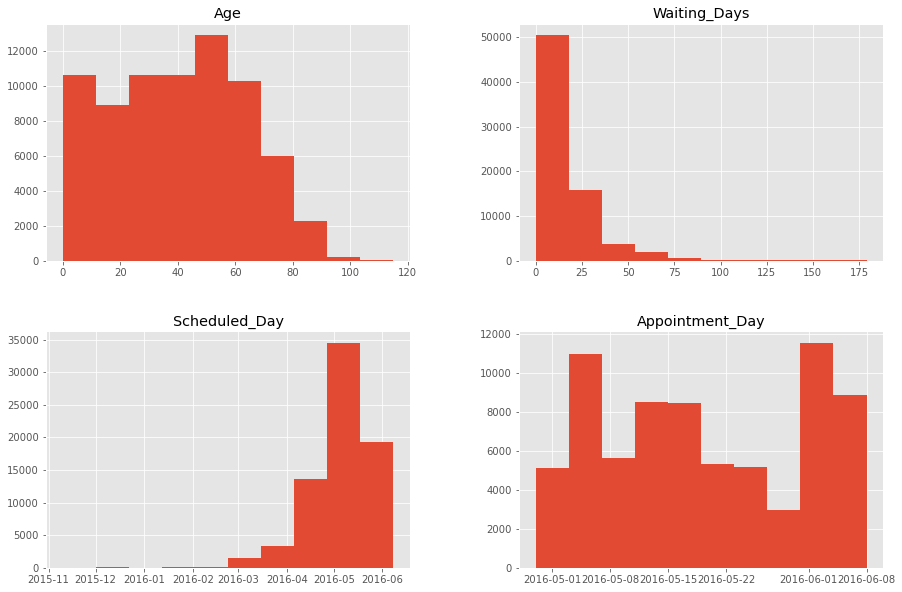

In [20]:
#now take a look of that spread
plt.style.use("ggplot")

df.hist(figsize = (15,10))

plt.tight_layout;

### we can see that the majorty of patients are in their 50s, with waiting time almost 2 weeks.. lots of schedules were made May and June 2016 for appointments in May-August  of the same year.

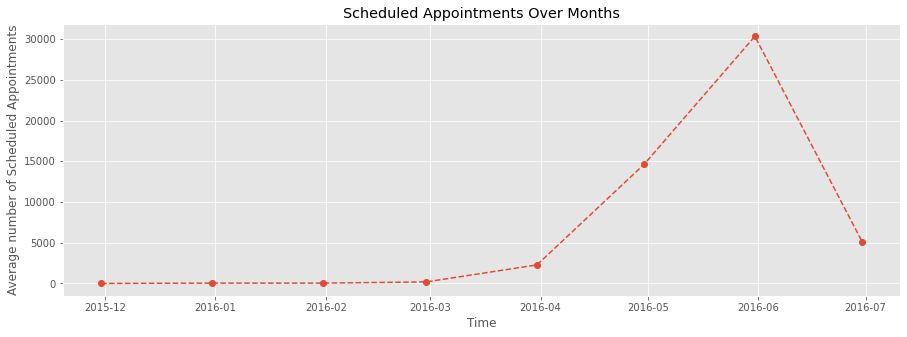

In [21]:
#reassign the index to time to make a time series analysis.
Scheduled_df = df.copy()
Scheduled_df.set_index('Scheduled_Day', inplace = True)
monthly_scheduled = Scheduled_df.resample('m').agg({'Attendance': 'sum'})

#plotting scheduled days over time
plt.figure(figsize=(15,5))

plt.plot_date(x = monthly_scheduled.index, y = monthly_scheduled['Attendance'], linestyle = '--')

plt.title("Scheduled Appointments Over Months")
plt.xlabel("Time")
plt.ylabel("Average number of Scheduled Appointments");

### there was a raising with peak on June 2016 but suddenly went down again. 

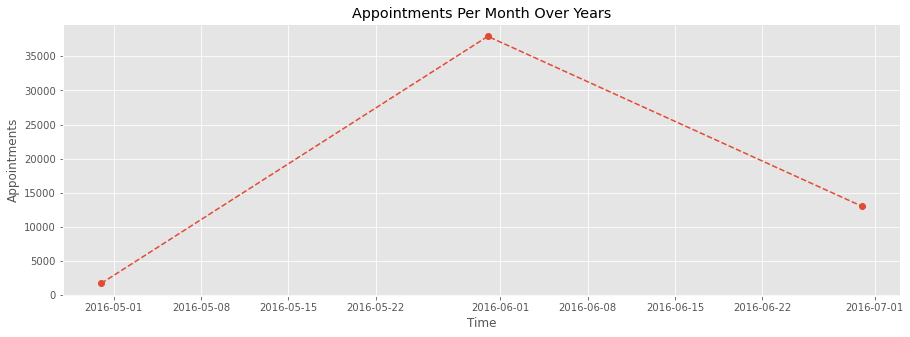

In [22]:
#reassign the index to time to make a time series analysis.
Appointment_df = df.copy()
Appointment_df.set_index('Appointment_Day', inplace = True)
monthly_appointments = Appointment_df.resample('m').agg({'Attendance': 'sum'})

#plotting account activity over time
plt.figure(figsize=(15,5))

plt.plot_date(x = monthly_appointments.index, y = monthly_appointments['Attendance'], linestyle = '--')

plt.title("Appointments Per Month Over Years")
plt.xlabel("Time")
plt.ylabel("Appointments");

### constant raising till the peak on -again- june 2016 then dropping again!

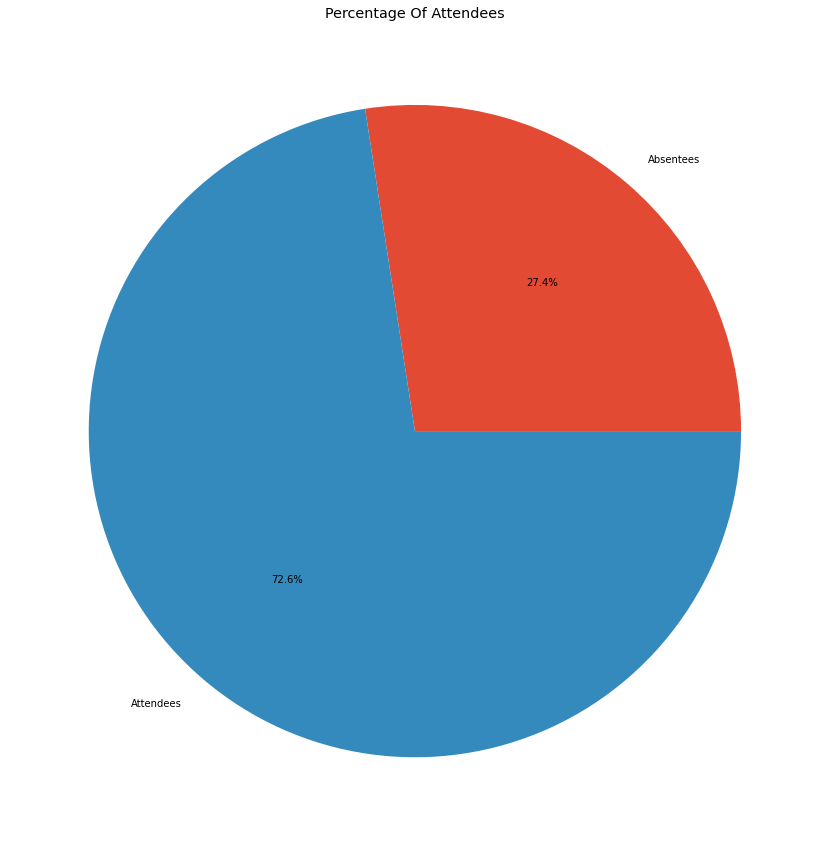

In [23]:
#how many of them actually miss their appointment?
plt.figure(figsize=(15,15))

x = df.Attendance.value_counts()
labels = 'Absentees', 'Attendees'
sizes = [x[0], x[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("Percentage Of Attendees");

### Well, the majority seems to be committed 😊

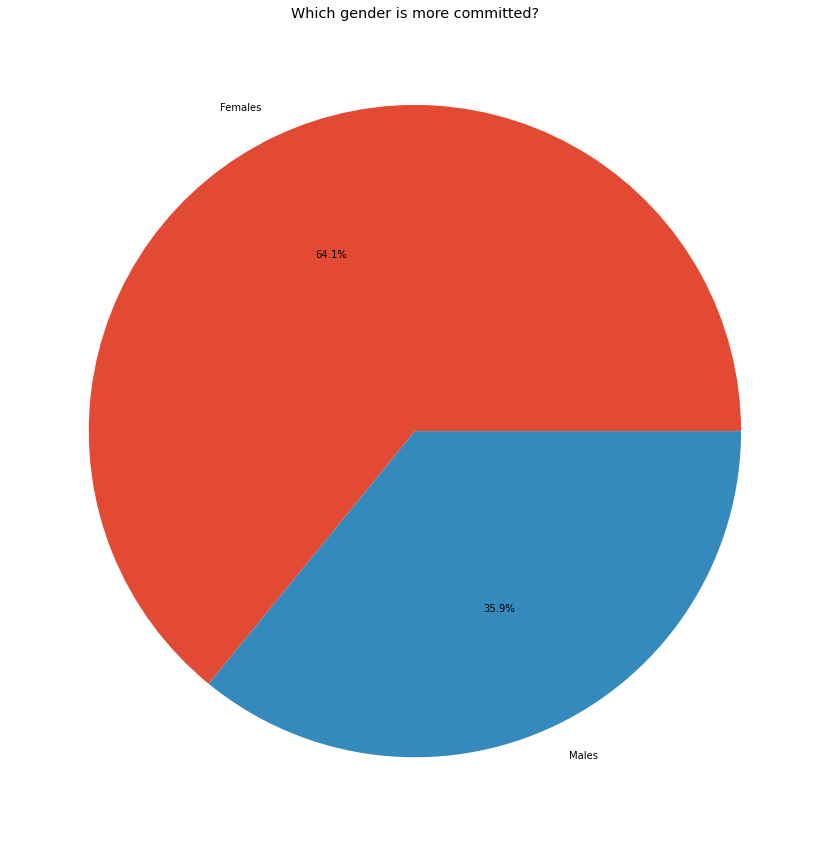

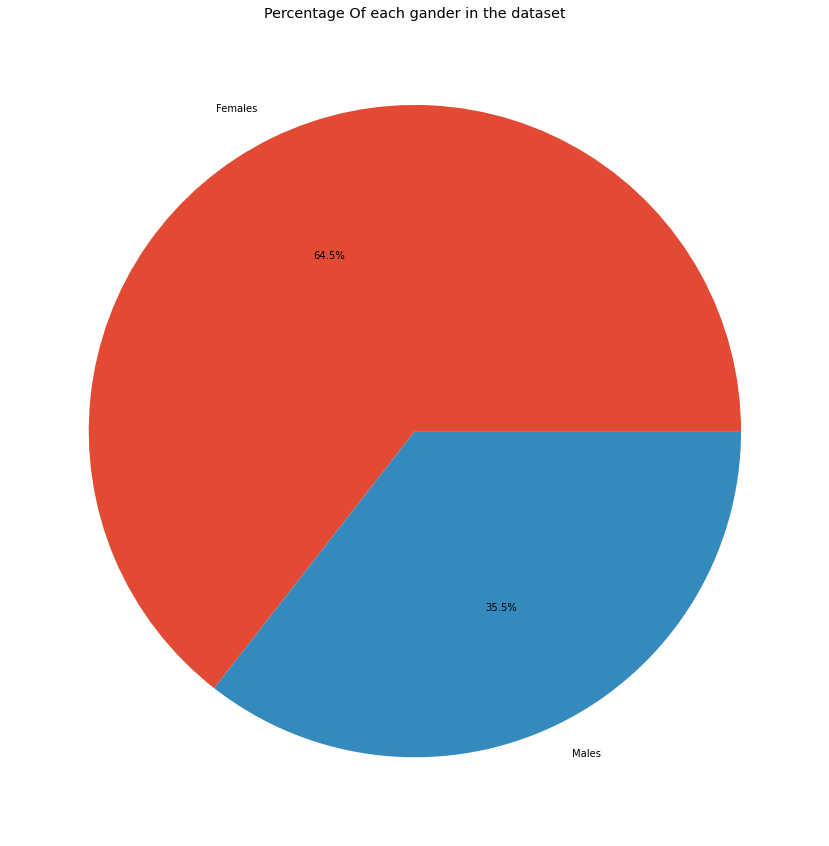

In [24]:
#do the gender has an effect o the attendance?
plt.figure(figsize=(15,15))

x1 = df.groupby("Gender").Attendance.sum()
labels = 'Females', 'Males'
sizes = [x1[0], x1[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Which gender is more committed?")


#and is it really because females are more comitted or are they just  majorty in the dataset?
plt.figure(figsize=(15,15))

x2 = df.Gender.value_counts()
labels = 'Females', 'Males'
sizes = [x2[0], x2[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Percentage Of each gander in the dataset");

### most of the attendees are females? well, the majorty of sample are females!

In [25]:
# Gorping age for analysis seek
df['Age_Groups'] = pd.cut(df.Age, [0, 14, 24, 64, 120], labels = ['Children', 'Youth', 'Adults', 'Seniors'])

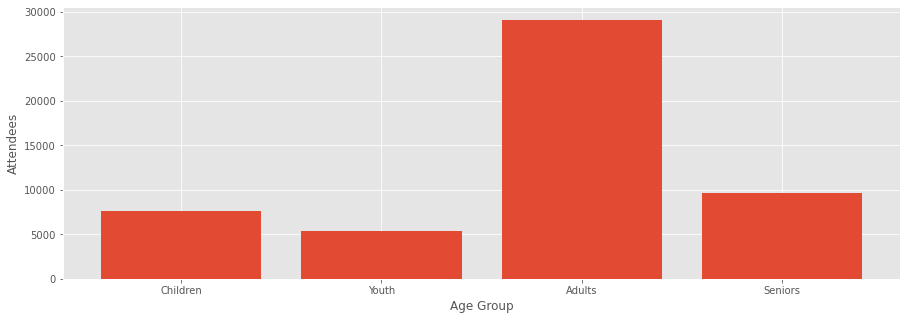

In [26]:
#what about their ages?
plt.figure(figsize=(15,5))

x = df.groupby("Age_Groups").Attendance.sum()
labels = 'Children', 'Youth', 'Adults', 'Seniors'
sizes = [x[0], x[1], x[2], x[3]]
plt.bar(labels, sizes)

plt.xlabel('Age Group')
plt.ylabel('Attendees');

### Well, teens are careless anyways. 🤷‍♀️

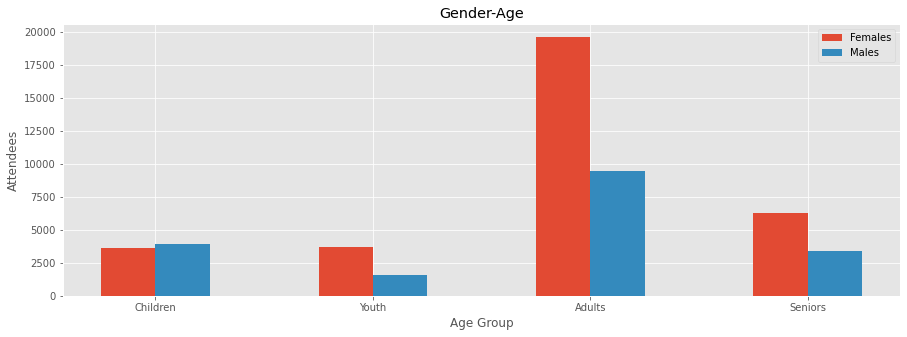

In [27]:
#let's be more specific 
plt.figure(figsize=(15,5))
x = df.groupby(["Age_Groups", 'Gender']).Attendance.sum()
x_labels = 'Children', 'Youth', 'Adults', 'Seniors'
x_loc = np.arange(len(x_labels))
w = 0.25

females = [x[0], x[2], x[4], x[6]] 
plt.bar(x_loc, females, width = w, label = 'Females')

males = [x[1], x[3], x[5], x[7]] 
plt.bar(x_loc + w, males, width = w, label = 'Males')

plt.xlabel('Age Group')
plt.ylabel('Attendees')
plt.title("Gender-Age")
plt.xticks(ticks = x_loc+w/2, labels = x_labels)
plt.legend();

### woha! G-R-E-A-T job women, adulting really means commeting.

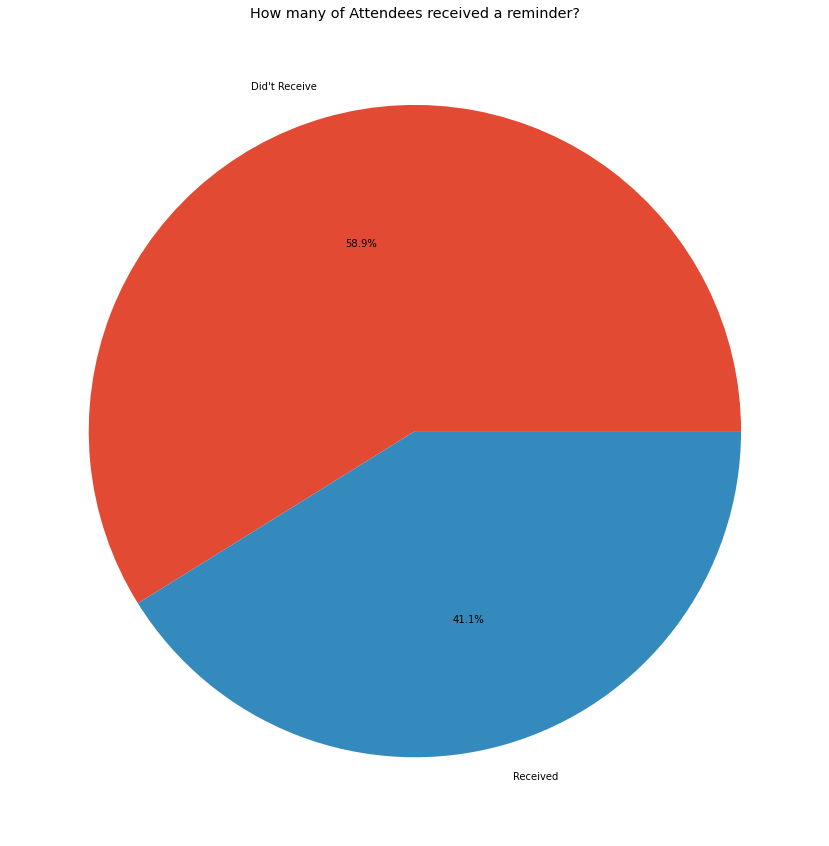

In [28]:
#maybe they forgot of the appointment and just need a little reminder?
x = df.groupby("SMS_Received").Attendance.sum()
plt.figure(figsize=(15,15))

labels = "Did't Receive", 'Received'
sizes = [x[0], x[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("How many of Attendees received a reminder?");

### if you were really sick you won't need that msg much to rush to the hospital right 🤷‍♀️

In [29]:
# Gorping waiting time for easier analysis
df['Waiting_Duration'] = pd.cut(df.Waiting_Days ,[0, 1, 7, 15, 30, 90, 180], labels = ['Same_Day', 'Up_To_Week', 'Almost_2_Weeks', 'Up_To_Month', 'Up_To_3_Months', 'Up_to_6_Months'])

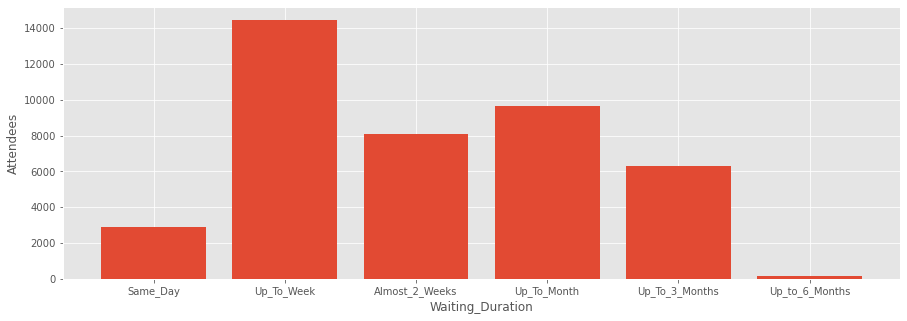

In [30]:
#How much did they wait
plt.figure(figsize=(15,5))

x = df.groupby("Waiting_Duration").Attendance.sum()
labels = 'Same_Day', 'Up_To_Week', 'Almost_2_Weeks', 'Up_To_Month', 'Up_To_3_Months', 'Up_to_6_Months'
sizes = [x[0], x[1], x[2], x[3], x[4], x[5]]
plt.bar(labels, sizes)

plt.xlabel("Waiting_Duration")
plt.ylabel('Attendees');

### waiting 6 months for a doctor's appointment? it's either the pain already gone or the patient  is already gone! 😁

In [31]:
df.groupby(["Waiting_Duration", 'SMS_Received']).Attendance.sum()

Waiting_Duration  SMS_Received
Same_Day          False           2897
                  True               0
Up_To_Week        False           8039
                  True            6423
Almost_2_Weeks    False           3182
                  True            4913
Up_To_Month       False           3486
                  True            6148
Up_To_3_Months    False           2246
                  True            4081
Up_to_6_Months    False             56
                  True             101
Name: Attendance, dtype: int64

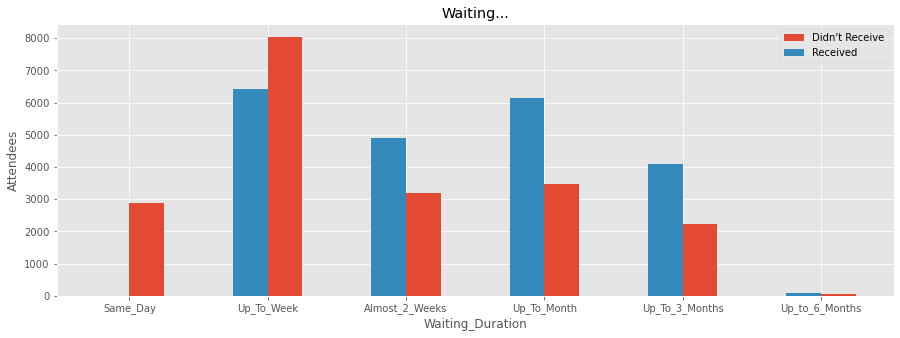

In [32]:
#that needs a deeper look..
plt.figure(figsize=(15,5))
x = df.groupby(["Waiting_Duration", 'SMS_Received']).Attendance.sum()
x_labels = 'Same_Day', 'Up_To_Week', 'Almost_2_Weeks', 'Up_To_Month', 'Up_To_3_Months', 'Up_to_6_Months'
x_loc = np.arange(len(x_labels))
w = 0.25

Didnt_Receive  = [x[0], x[2], x[4], x[6], x[8], x[10]] 
plt.bar(x_loc + w, Didnt_Receive, width = w, label = "Didn't Receive")

Received = [x[1], x[3], x[5], x[7], x[9], x[11]] 
plt.bar(x_loc, Received, width = w, label = 'Received')

plt.xlabel("Waiting_Duration")
plt.ylabel('Attendees')
plt.title("Waiting...")
plt.xticks(ticks = x_loc+w/2, labels = x_labels)
plt.legend();

### a lil reminder really helps when the waiting time is too long..

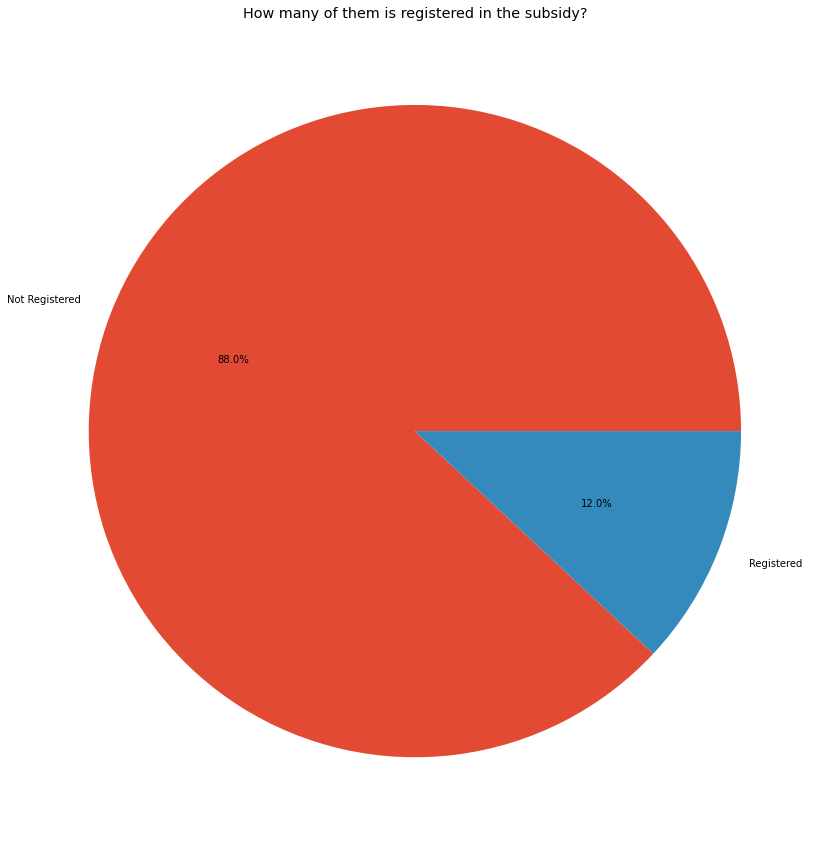

In [33]:
#Maybe they can't afford the visit?
plt.figure(figsize=(15,15))
x = df.groupby("Subsidy").Attendance.sum()
labels = 'Not Registered', 'Registered'
sizes = [x[0], x[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("How many of them is registered in the subsidy?");

In [34]:
#testing
df.groupby("Chronic_Illnesses").Attendance.sum()

Chronic_Illnesses
Four         8
One      11705
Three      471
Two       5194
Zero     35278
Name: Attendance, dtype: int64

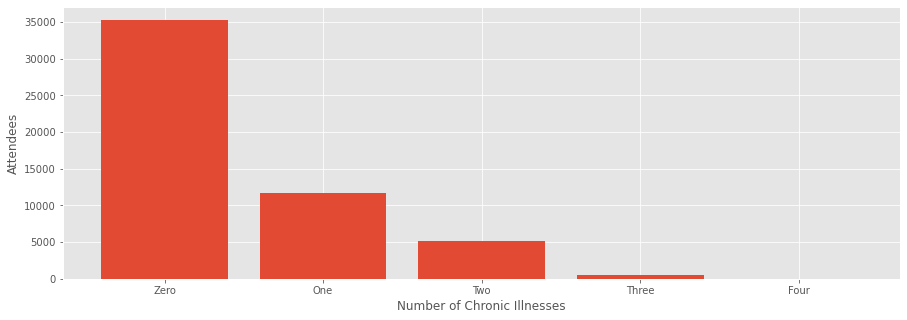

In [35]:
#maybe their history with chronic diseases has an effect
plt.figure(figsize=(15,5))
x = df.groupby("Chronic_Illnesses").Attendance.sum()
labels = 'Zero', 'One', 'Two', 'Three', 'Four'
sizes = [x[4], x[1], x[3], x[2], x[0]]
plt.bar(labels, sizes)
plt.xlabel("Number of Chronic Illnesses")
plt.ylabel("Attendees");

### it's sad to see that people are not learning from their pain..

In [36]:
#testing
df.groupby(["Chronic_Illnesses", 'Subsidy']).Attendance.sum()

Chronic_Illnesses  Subsidy
Four               False          8
                   True           0
One                False      10464
                   True        1241
Three              False        445
                   True          26
Two                False       4743
                   True         451
Zero               False      30700
                   True        4578
Name: Attendance, dtype: int64

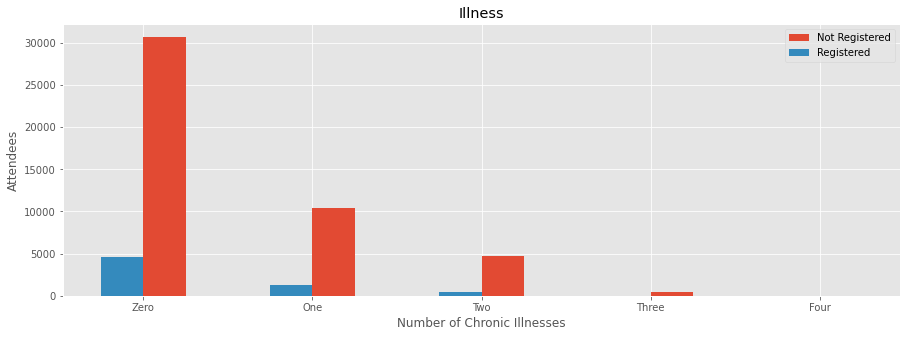

In [37]:
#let's be more specific 
plt.figure(figsize=(15,5))
x = df.groupby(["Chronic_Illnesses", 'Subsidy']).Attendance.sum()
x_labels = 'Zero', 'One', 'Two', 'Three', 'Four'
x_loc = np.arange(len(x_labels))
w = 0.25

No = [x[8], x[2], x[6], x[4], x[0]]
plt.bar(x_loc + w, No, width = w, label = 'Not Registered')

Yes = [x[9], x[3], x[7], x[5], x[1]]
plt.bar(x_loc, Yes, width = w, label = 'Registered')


plt.xlabel("Number of Chronic Illnesses")
plt.ylabel("Attendees")
plt.title("Illness")
plt.xticks(ticks = x_loc+w/2, labels = x_labels)
plt.legend();

### I don't think the subsidy itself affects much

<a id='conclusions'></a>
# Conclusions:
### Although most of them made it to their appointment, there might be several effects on the reason why people miss their doctor's appointment.



## Timing Effect:
#### Hence, I noticed from the graphs the increase in scheduled appointments in June 2016 so, I searched the internet on what was going on then in Brazil and I found out it was the outbreak of the Zika virus. maybe not all the recorded were for the infected... but surely the epidemic made them more aware of the importance of their general health.


## Gender and Age:

#### Not surprising that the graphs show what looks like women are more committed but do not jump to conclusions, that does not mean men are less caring. It is only because women are much of the population.

#### So, let us consider the ages then; teens are the least committed, maybe it is just the nature of this age stage ... carless life :)
#### Adults, on the other hand, are the most committed because they are grown enough to know the importance of their health and punctuality. meanwhile, we cannot blame children as they do not have control over stuff like this it is the parent's fault.

## Do you remember me?

#### Another important factor is the waiting time, we can see that many of them are committed when the waiting time is up to a week even if they did not receive a reminder SMS. And the least committed are those with waiting time up to 6 months!
#### like who would remember an appointment 6 months later! maybe they don't even need that appointment anymore. however, receiving an SMS for waiting times more than 10 days may help.

## They know the pain...

#### It is sad to see that people with a history of chronic diseases are less committed to comparing to those who don’t... maybe they had enough injections and are just tired of lots of medications? we need to look after them more closely, especially those who are not registered in the Bolsa Família subsidy as they might not be able to afford the treatment expenses.

## Limitations:

#### 1. the most important thing is it was not clear if this appointment was a dentist, a cardiologist or other! 
#### 2. women are already a majorty in the ample so we cant decide if commitng to the appointment is actually related to gender or not.
#### 3. most of the data collected were nominal so we could't make much inferential tests and we can't also show strong correlation between them.
#### 4. we don't have much details on some factors; for example some poor are reggistired in Bolsa Família but that doesn't state that other's are rich enoughf to afford the fee.